#Introdução

A tecnologia se faz presente em diversas áreas do conhecimento, dentre elas está a área de Recursos Humanos. Muitas empresas haviam os dados, mas não sabiam o que fazer com estes dados, então se criou a metodologia do People Analytics.

Essa metodologia tem por objetivo principal tornar a gestão de pessoas mais eficaz. Trocando em miúdos, seria analisar os dados de forma estratégica para uma melhor contratação, promoção e dispensa de funcionários, bem como contribuir na produtividade da empresa e tomar melhores decisões.

# Objetivo do projeto

Este projeto tem como objetivo fazer uma análise do dataset: [Expanded HR Analytics Data Lab](https://www.kaggle.com/krismurphy01/data-lab) e explicar quais as principais informações e como elas se relacionam. Tirar conclusões em cada passo da análise e deixar claro as expectativas com essa análise.

Além disso, enumerar possíveis problemas que podem ser resolvidos utilizando Machine Learning e construir modelos passo-a-passo mostrando a decisão de features, labels e experimentações serão mostrados neste Notebook.

# Importando bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import Pipeline
from scipy import stats
from statsmodels.stats import weightstats as stests

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Carregando e lendo os dados

In [2]:
data = pd.read_csv('HR_Engagement_Sat_Sales_UpdatedV4.0.csv')
data.head()

,ID,Name,Department,GEO,Role,Rising_Star,Will_Relocate,Critical,Trending Perf,Talent_Level,Validated_Talent_Level,Percent_Remote,EMP_Sat_OnPrem_1,EMP_Sat_OnPrem_2,EMP_Sat_OnPrem_3,EMP_Sat_OnPrem_4,EMP_Sat_OnPrem_5,EMP_Sat_Remote_1,EMP_Sat_Remote_2,EMP_Sat_Remote_3,EMP_Sat_Remote_4,EMP_Sat_Remote_5,EMP_Engagement_1,EMP_Engagement_2,EMP_Engagement_3,EMP_Engagement_4,EMP_Engagement_5,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left_Company,CSR Factor,promotion_last_5years,sales,salary,Gender,LinkedIn_Hits,Emp_Work_Status2,Emp_Work_Status_3,Emp_Work_Status_4,Emp_Work_Status_5,Emp_Identity,Emp_Role,Emp_Position,Emp_Title,Women_Leave,Men_Leave,Emp_Competitive_1,Emp_Competitive_2,Emp_Competitive_3,Emp_Competitive_4,Emp_Competitive_5,Emp_Collaborative_1,Emp_Collaborative_2,Emp_Collaborative_3,Emp_Collaborative_4,Emp_Collaborative_5,Sensor_StepCount,Sensor_Heartbeat(Average/Min),Sensor_Proximity(1-highest/10-lowest)
0,1,BRADDY,Operations,US,VP,NaN,0,1.0,3,6,6,0.4,3.0,3.0,4.0,3.0,5.0,2,3,2,3,2,5,5,4,4,3,0.36,3,168,3,1,0,NaN,0,sales,low,M,5,4,3,1,1,1,1,2,1,NaN,1.0,2,4,2,2,2,2,2,2,1,5,1841,61,9
1,2,BORST,Sales,UK,Senior Director,NaN,0,NaN,3,6,6,0.4,3.0,3.0,4.0,3.0,5.0,2,3,2,3,2,5,5,4,4,3,0.36,5,159,2,0,0,NaN,0,accounting,low,F,58,3,3,4,3,2,1,2,1,0.0,NaN,2,2,1,4,1,3,2,5,1,5,1990,90,8
2,3,BIRDWELL,Finance,France,Senior Director,NaN,0,NaN,3,6,6,0.4,3.0,3.0,4.0,3.0,5.0,2,3,2,3,2,5,5,4,4,3,0.36,2,282,3,0,0,NaN,0,product_mng,medium,F,42,2,4,1,3,1,1,2,2,1.0,NaN,1,5,1,2,5,2,2,4,4,4,3193,80,8
3,4,BENT,Human Resources,China,Senior Director,NaN,0,NaN,3,6,6,0.4,3.0,3.0,4.0,3.0,5.0,2,3,2,3,2,5,5,4,4,3,0.36,4,278,4,1,0,NaN,0,product_mng,high,M,37,3,1,4,5,2,1,2,1,NaN,1.0,1,1,2,5,1,1,2,4,4,1,3248,77,6
4,5,BAZAN,IT,Korea,Director,NaN,0,NaN,3,6,6,0.4,3.0,3.0,4.0,3.0,5.0,2,3,2,3,2,5,5,4,4,3,0.36,6,256,5,0,0,NaN,0,sales,low,F,6,4,5,4,5,1,1,2,1,1.0,NaN,1,4,1,5,3,5,1,2,5,4,3149,80,10


# EDA e Pré - Processamento dos dados
Análise exploratória de dados etapas do pré processamento de dados

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 62 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   ID                                     14999 non-null  int64  
 1   Name                                   14997 non-null  object 
 2   Department                             14999 non-null  object 
 3   GEO                                    14999 non-null  object 
 4   Role                                   14999 non-null  object 
 5   Rising_Star                            21 non-null     float64
 6   Will_Relocate                          14999 non-null  int64  
 7   Critical                               480 non-null    float64
 8   Trending Perf                          14999 non-null  int64  
 9   Talent_Level                           14999 non-null  int64  
 10  Validated_Talent_Level                 14999 non-null  int64  
 11  Pe

Por meio da função ".info()" já podemos obter várias informações a respeito do Dataset. Ele nos mostra a quantidade de valores não nulos de cada coluna, os tipos das colunas e o total de linhas e colunas (14999 e 62, respectivamente).

As colunas que mais chamam atenção são "Rising_Star", "Critical", "CSR Factor", "Women_Leave" e "Men_Leave" pela quantidade de valores nulos, logo, elas serão tratadas inicialmente.

As colunas "Rising_Star" e "Critical" tem muitos valores nulos, o que torna a análise dessas colunas difícil, então serei breve com elas.

In [4]:
data.query('Rising_Star == "Nan"').head()

,ID,Name,Department,GEO,Role,Rising_Star,Will_Relocate,Critical,Trending Perf,Talent_Level,Validated_Talent_Level,Percent_Remote,EMP_Sat_OnPrem_1,EMP_Sat_OnPrem_2,EMP_Sat_OnPrem_3,EMP_Sat_OnPrem_4,EMP_Sat_OnPrem_5,EMP_Sat_Remote_1,EMP_Sat_Remote_2,EMP_Sat_Remote_3,EMP_Sat_Remote_4,EMP_Sat_Remote_5,EMP_Engagement_1,EMP_Engagement_2,EMP_Engagement_3,EMP_Engagement_4,EMP_Engagement_5,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left_Company,CSR Factor,promotion_last_5years,sales,salary,Gender,LinkedIn_Hits,Emp_Work_Status2,Emp_Work_Status_3,Emp_Work_Status_4,Emp_Work_Status_5,Emp_Identity,Emp_Role,Emp_Position,Emp_Title,Women_Leave,Men_Leave,Emp_Competitive_1,Emp_Competitive_2,Emp_Competitive_3,Emp_Competitive_4,Emp_Competitive_5,Emp_Collaborative_1,Emp_Collaborative_2,Emp_Collaborative_3,Emp_Collaborative_4,Emp_Collaborative_5,Sensor_StepCount,Sensor_Heartbeat(Average/Min),Sensor_Proximity(1-highest/10-lowest)
0,1,BRADDY,Operations,US,VP,NaN,0,1.0,3,6,6,0.4,3.0,3.0,4.0,3.0,5.0,2,3,2,3,2,5,5,4,4,3,0.36,3,168,3,1,0,NaN,0,sales,low,M,5,4,3,1,1,1,1,2,1,NaN,1.0,2,4,2,2,2,2,2,2,1,5,1841,61,9
1,2,BORST,Sales,UK,Senior Director,NaN,0,NaN,3,6,6,0.4,3.0,3.0,4.0,3.0,5.0,2,3,2,3,2,5,5,4,4,3,0.36,5,159,2,0,0,NaN,0,accounting,low,F,58,3,3,4,3,2,1,2,1,0.0,NaN,2,2,1,4,1,3,2,5,1,5,1990,90,8
2,3,BIRDWELL,Finance,France,Senior Director,NaN,0,NaN,3,6,6,0.4,3.0,3.0,4.0,3.0,5.0,2,3,2,3,2,5,5,4,4,3,0.36,2,282,3,0,0,NaN,0,product_mng,medium,F,42,2,4,1,3,1,1,2,2,1.0,NaN,1,5,1,2,5,2,2,4,4,4,3193,80,8
3,4,BENT,Human Resources,China,Senior Director,NaN,0,NaN,3,6,6,0.4,3.0,3.0,4.0,3.0,5.0,2,3,2,3,2,5,5,4,4,3,0.36,4,278,4,1,0,NaN,0,product_mng,high,M,37,3,1,4,5,2,1,2,1,NaN,1.0,1,1,2,5,1,1,2,4,4,1,3248,77,6
4,5,BAZAN,IT,Korea,Director,NaN,0,NaN,3,6,6,0.4,3.0,3.0,4.0,3.0,5.0,2,3,2,3,2,5,5,4,4,3,0.36,6,256,5,0,0,NaN,0,sales,low,F,6,4,5,4,5,1,1,2,1,1.0,NaN,1,4,1,5,3,5,1,2,5,4,3149,80,10


In [5]:
data.query('Critical == "Nan"').head()

,ID,Name,Department,GEO,Role,Rising_Star,Will_Relocate,Critical,Trending Perf,Talent_Level,Validated_Talent_Level,Percent_Remote,EMP_Sat_OnPrem_1,EMP_Sat_OnPrem_2,EMP_Sat_OnPrem_3,EMP_Sat_OnPrem_4,EMP_Sat_OnPrem_5,EMP_Sat_Remote_1,EMP_Sat_Remote_2,EMP_Sat_Remote_3,EMP_Sat_Remote_4,EMP_Sat_Remote_5,EMP_Engagement_1,EMP_Engagement_2,EMP_Engagement_3,EMP_Engagement_4,EMP_Engagement_5,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left_Company,CSR Factor,promotion_last_5years,sales,salary,Gender,LinkedIn_Hits,Emp_Work_Status2,Emp_Work_Status_3,Emp_Work_Status_4,Emp_Work_Status_5,Emp_Identity,Emp_Role,Emp_Position,Emp_Title,Women_Leave,Men_Leave,Emp_Competitive_1,Emp_Competitive_2,Emp_Competitive_3,Emp_Competitive_4,Emp_Competitive_5,Emp_Collaborative_1,Emp_Collaborative_2,Emp_Collaborative_3,Emp_Collaborative_4,Emp_Collaborative_5,Sensor_StepCount,Sensor_Heartbeat(Average/Min),Sensor_Proximity(1-highest/10-lowest)
1,2,BORST,Sales,UK,Senior Director,NaN,0,NaN,3,6,6,0.4,3.0,3.0,4.0,3.0,5.0,2,3,2,3,2,5,5,4,4,3,0.36,5,159,2,0,0,NaN,0,accounting,low,F,58,3,3,4,3,2,1,2,1,0.0,NaN,2,2,1,4,1,3,2,5,1,5,1990,90,8
2,3,BIRDWELL,Finance,France,Senior Director,NaN,0,NaN,3,6,6,0.4,3.0,3.0,4.0,3.0,5.0,2,3,2,3,2,5,5,4,4,3,0.36,2,282,3,0,0,NaN,0,product_mng,medium,F,42,2,4,1,3,1,1,2,2,1.0,NaN,1,5,1,2,5,2,2,4,4,4,3193,80,8
3,4,BENT,Human Resources,China,Senior Director,NaN,0,NaN,3,6,6,0.4,3.0,3.0,4.0,3.0,5.0,2,3,2,3,2,5,5,4,4,3,0.36,4,278,4,1,0,NaN,0,product_mng,high,M,37,3,1,4,5,2,1,2,1,NaN,1.0,1,1,2,5,1,1,2,4,4,1,3248,77,6
4,5,BAZAN,IT,Korea,Director,NaN,0,NaN,3,6,6,0.4,3.0,3.0,4.0,3.0,5.0,2,3,2,3,2,5,5,4,4,3,0.36,6,256,5,0,0,NaN,0,sales,low,F,6,4,5,4,5,1,1,2,1,1.0,NaN,1,4,1,5,3,5,1,2,5,4,3149,80,10
5,6,BANK,Warehouse,Colombia,Director,NaN,0,NaN,3,6,6,0.4,3.0,3.0,4.0,3.0,5.0,2,3,2,3,2,5,5,4,4,3,0.36,4,97,4,0,0,NaN,0,sales,medium,F,17,1,4,5,3,2,1,1,1,0.0,NaN,1,3,2,2,3,2,2,4,2,4,1204,85,10


In [6]:
data['CSR Factor'].unique()

array([nan,  5.])

No Dataset já dizia para ignorar, mas para ter certeza quis analisa-la. Como visto acima, só há valores nulos e "5".

In [7]:
data["Women_Leave"].isna().sum()

7403

In [8]:
data['Men_Leave'].value_counts()

1.0    4420
0.0     445
Name: Men_Leave, dtype: int64

As colunas "Women_Leave" e "Men_Leave" são desmembramentos da variável alvo, então iremos exclui-las mais adiante.

Agora trataremos os valores faltantes nas demais colunas

In [9]:
data.loc[data['Name'].isna()]

,ID,Name,Department,GEO,Role,Rising_Star,Will_Relocate,Critical,Trending Perf,Talent_Level,Validated_Talent_Level,Percent_Remote,EMP_Sat_OnPrem_1,EMP_Sat_OnPrem_2,EMP_Sat_OnPrem_3,EMP_Sat_OnPrem_4,EMP_Sat_OnPrem_5,EMP_Sat_Remote_1,EMP_Sat_Remote_2,EMP_Sat_Remote_3,EMP_Sat_Remote_4,EMP_Sat_Remote_5,EMP_Engagement_1,EMP_Engagement_2,EMP_Engagement_3,EMP_Engagement_4,EMP_Engagement_5,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left_Company,CSR Factor,promotion_last_5years,sales,salary,Gender,LinkedIn_Hits,Emp_Work_Status2,Emp_Work_Status_3,Emp_Work_Status_4,Emp_Work_Status_5,Emp_Identity,Emp_Role,Emp_Position,Emp_Title,Women_Leave,Men_Leave,Emp_Competitive_1,Emp_Competitive_2,Emp_Competitive_3,Emp_Competitive_4,Emp_Competitive_5,Emp_Collaborative_1,Emp_Collaborative_2,Emp_Collaborative_3,Emp_Collaborative_4,Emp_Collaborative_5,Sensor_StepCount,Sensor_Heartbeat(Average/Min),Sensor_Proximity(1-highest/10-lowest)
5204,5205,NaN,Finance,Korea,Level 1,NaN,1,NaN,3,6,6,0.4,3.0,1.0,2.0,1.0,1.0,3,5,4,4,5,1,2,3,2,1,0.62,5,198,5,1,1,5.0,0,RandD,low,M,65,2,5,1,5,2,2,2,2,NaN,1.0,1,3,1,2,2,3,1,5,1,2,1994,90,9
13509,13510,NaN,Human Resources,Australia,Level 2-4,NaN,1,NaN,3,6,6,0.8,3.0,3.0,4.0,3.0,4.0,3,5,4,4,5,5,5,4,4,3,0.95,5,149,2,0,0,NaN,0,technical,low,F,6,2,5,5,2,2,3,2,3,0.0,NaN,4,3,2,5,5,3,2,1,1,1,4661,73,4


A variável "Name" não é tão importante para a análise e futura modelagem, mas em um caso real, seria importante saber o motivo desse valor nulo do Dataset.

In [10]:
data['EMP_Sat_OnPrem_1'].value_counts()

3.0    14871
Name: EMP_Sat_OnPrem_1, dtype: int64

In [11]:
data['EMP_Sat_OnPrem_5'].value_counts()

4.0    7737
5.0    5141
1.0    1993
Name: EMP_Sat_OnPrem_5, dtype: int64

Utilizando método describe para ter melhor noção dos dados e selecionar as colunas úteis das que não dão muita informação e são desnecessários no momento.

In [12]:
 data.describe()

,ID,Rising_Star,Will_Relocate,Critical,Trending Perf,Talent_Level,Validated_Talent_Level,Percent_Remote,EMP_Sat_OnPrem_1,EMP_Sat_OnPrem_2,EMP_Sat_OnPrem_3,EMP_Sat_OnPrem_4,EMP_Sat_OnPrem_5,EMP_Sat_Remote_1,EMP_Sat_Remote_2,EMP_Sat_Remote_3,EMP_Sat_Remote_4,EMP_Sat_Remote_5,EMP_Engagement_1,EMP_Engagement_2,EMP_Engagement_3,EMP_Engagement_4,EMP_Engagement_5,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left_Company,CSR Factor,promotion_last_5years,LinkedIn_Hits,Emp_Work_Status2,Emp_Work_Status_3,Emp_Work_Status_4,Emp_Work_Status_5,Emp_Identity,Emp_Role,Emp_Position,Emp_Title,Women_Leave,Men_Leave,Emp_Competitive_1,Emp_Competitive_2,Emp_Competitive_3,Emp_Competitive_4,Emp_Competitive_5,Emp_Collaborative_1,Emp_Collaborative_2,Emp_Collaborative_3,Emp_Collaborative_4,Emp_Collaborative_5,Sensor_StepCount,Sensor_Heartbeat(Average/Min),Sensor_Proximity(1-highest/10-lowest)
count,14999.000000,21.0,14999.000000,480.0,14999.0,14999.0,14999.0,14999.000000,14871.0,14871.000000,14871.000000,14871.000000,14871.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,1713.0,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,7596.000000,4865.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,7500.000000,1.0,0.499833,1.0,3.0,6.0,6.0,0.617321,3.0,2.731962,3.731962,2.731962,3.943649,2.839723,4.367691,3.367691,3.761784,3.973598,4.047670,4.285752,3.761917,3.523835,2.523835,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,5.0,0.021268,18.553904,3.001867,3.014468,3.005800,3.002867,2.141343,2.116274,1.998400,1.990066,0.707741,0.908530,2.156010,2.987199,2.144010,2.999067,2.987066,2.979532,1.676245,2.998533,3.005200,3.016934,3406.693246,77.967198,6.399360
std,4329.982679,0.0,0.500017,0.0,0.0,0.0,0.0,0.193841,0.0,0.681369,0.681369,0.681369,1.244511,0.776054,0.929979,0.929979,0.580834,1.367462,1.703696,1.277772,0.425924,0.851848,0.851848,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.0,0.144281,18.987335,1.413788,1.417319,1.418791,1.413008,1.023277,1.010454,0.865389,0.856232,0.454831,0.288306,1.032378,1.416793,1.030439,1.406128,1.412314,1.412579,0.865230,1.410058,1.410191,1.412225,1755.742272,7.252848,2.588091
min,1.000000,1.0,0.000000,1.0,3.0,6.0,6.0,0.400000,3.0,1.000000,2.000000,1.000000,1.000000,2.000000,3.000000,2.000000,3.000000,2.000000,1.000000,2.000000,3.000000,2.000000,1.000000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,5.0,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1000.000000,60.000000,1.000000
25%,3750.500000,1.0,0.000000,1.0,3.0,6.0,6.0,0.400000,3.0,3.000000,4.000000,3.000000,4.000000,2.000000,3.000000,2.000000,3.000000,2.000000,5.000000,5.000000,4.000000,4.000000,3.000000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,5.0,0.000000,5.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,1704.500000,75.000000,5.000000
50%,7500.000000,1.0,0.000000,1.0,3.0,6.0,6.0,0.800000,3.0,3.000000,4.000000,3.000000,4.000000,3.000000,5.000000,4.000000,4.000000,5.000000,5.000000,5.000000,4.000000,4.000000,3.000000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,5.0,0.000000,9.000000,3.000000,3.000000,3.000000,3.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,3.000000,3.000000,3.000000,3376.000000,78.000000,7.000000
75%,11249.500000,1.0,1.000000,1.0,3.0,6.0,6

In [13]:
data.drop(['ID','Name','Rising_Star','Critical','Trending Perf','Talent_Level','Validated_Talent_Level','EMP_Sat_OnPrem_1','CSR Factor','sales','Women_Leave',
           'Men_Leave','EMP_Sat_OnPrem_2','EMP_Sat_OnPrem_3','EMP_Sat_OnPrem_4','EMP_Sat_OnPrem_5', 'EMP_Sat_Remote_3',	'EMP_Sat_Remote_4'], axis = 1, inplace = True)

In [14]:
#verificando se ainda há valores nulos
data.isna().sum()

Department                               0
GEO                                      0
Role                                     0
Will_Relocate                            0
Percent_Remote                           0
EMP_Sat_Remote_1                         0
EMP_Sat_Remote_2                         0
EMP_Sat_Remote_5                         0
EMP_Engagement_1                         0
EMP_Engagement_2                         0
EMP_Engagement_3                         0
EMP_Engagement_4                         0
EMP_Engagement_5                         0
last_evaluation                          0
number_project                           0
average_montly_hours                     0
time_spend_company                       0
Work_accident                            0
left_Company                             0
promotion_last_5years                    0
salary                                   0
Gender                                   0
LinkedIn_Hits                            0
Emp_Work_St

## Data Analysis

In [15]:
data.Department.value_counts()

IT                 2500
Sales              2500
Finance            2500
Operations         2500
Human Resources    2500
Warehouse          2499
Name: Department, dtype: int64

Os departamentos de cada empregado estão quase dividos perfeitamente 

In [16]:
group = data.groupby(by=['left_Company','GEO'])['Department'].count()
group

left_Company  GEO      
0             Australia    1228
              China        1264
              Colombia     1251
              France       1296
              Japan        1269
              Korea        1300
              Turkey       1244
              UK           1337
              US           1239
1             Australia     349
              China         403
              Colombia      408
              France        403
              Japan         400
              Korea         385
              Turkey        395
              UK            435
              US            393
Name: Department, dtype: int64

O agrupamento acima nos mostra a quantidade de pessoas que estão empregadas (0) e não estão empregadas na empresa (1) por país. Pode-se notar o grupo dominante em cada país relativo, é o de quem se manteve na empresa. Além disso, percebe-se a quantidade de pessoas em cada país, é equilibrada em seu grupo (contratados e quem não está mais empregado)

Obs: Selecionei o atributo "Department" aleatoriamente pois qualquer coluna nos traria a mesma contagem.

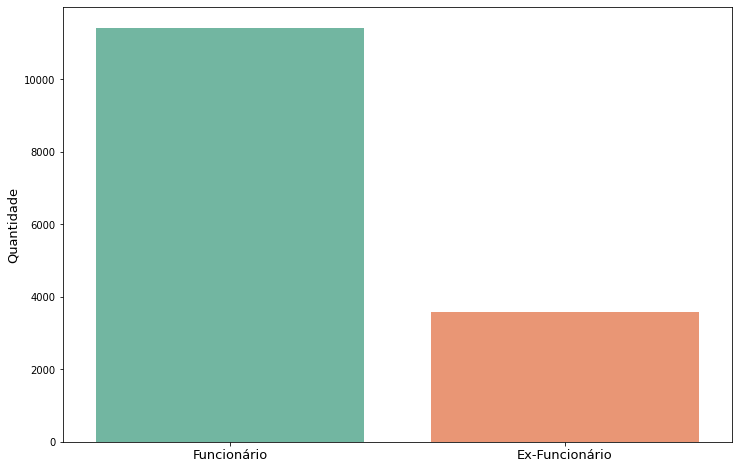

In [17]:
ax = sns.countplot(data.left_Company, palette="Set2")
ax.figure.set_size_inches(12, 8)
ax.set_ylabel('Quantidade', fontsize= 13)
ax.set_xlabel('')
ax.set_xticklabels(['Funcionário','Ex-Funcionário'], fontsize=13)
ax

Concluí-se que há bem mais empregados atualmente do que quem não está mais na empresas, nessa amostra.

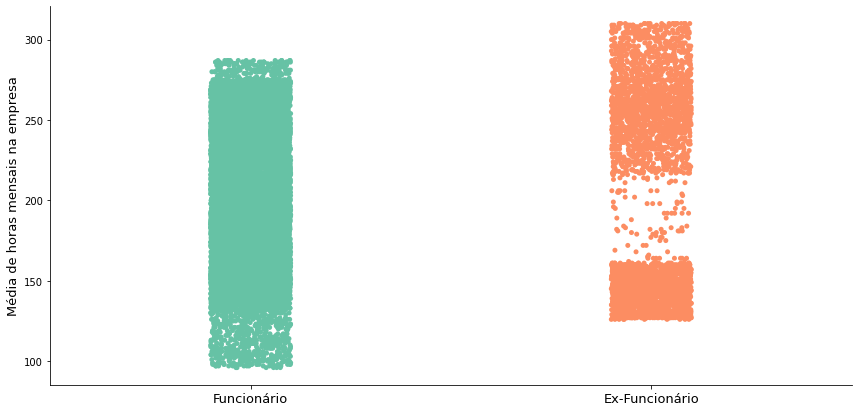

In [18]:
ax = sns.catplot(x='left_Company', y='average_montly_hours', data=data, height=6, aspect=2, palette="Set2")
ax.set_ylabels('Média de horas mensais na empresa', fontsize=13)
ax.set_xlabels('')
ax.set_xticklabels(['Funcionário','Ex-Funcionário'], fontsize=13)
ax

Notas:

1. A menor média de hora gasta trabalhando está no grupo dos empregados da empresa.
2. A  maior média de hora gasta trabalhando está no grupo de quem não é mais empregado da empresa
3. Os dados de média de hora gasta trabalhando de quem não está mais na empresa é mais disperso em relação a quem é contratado. Pode se notar que entre aproximadamente 160 e 210 horas, há poucos dados de quem deixou o trabalho.

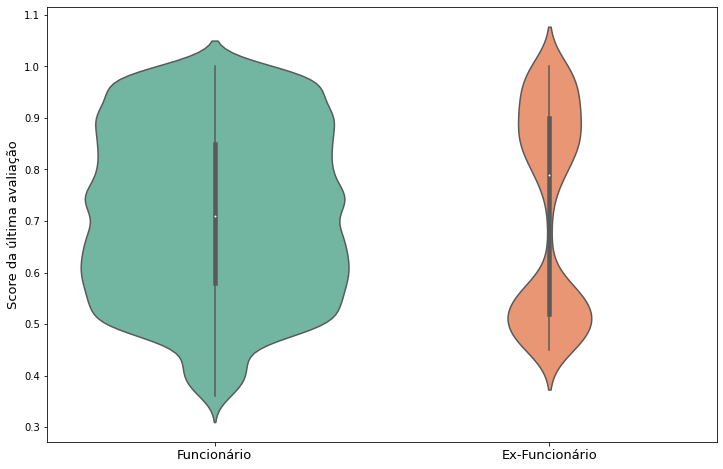

In [19]:
ax = sns.violinplot(x='left_Company', y='last_evaluation', data=data, palette="Set2", scale='count') #mostrando o acumulo dos dados 
ax.figure.set_size_inches(12, 8)
ax.set_ylabel('Score da última avaliação', fontsize=13)
ax.set_xlabel('')
ax.set_xticklabels(['Funcionário','Ex-Funcionário'], fontsize=13)
ax

Acima há um gráfico de comparação interessante, eu plotei este gráfico para ver a relação entre o score da avaliação de quem deixou e quem ainda está na empresa. Pode-se observar que quem é empregado na empresa tem a forma do Violino(densidade) mais larga, enquanto que quem não permaneceu empregado tem grande acúmulo entre 0.4 e 0.6 e depois em 0.8 e 1. 

Ou seja, há diferença entre as distribuições da última avaliação realizada entre os que continuam e os que não continuam na empresa e a distribuição dos que saíram é bimodal, com as avaliações concentradas nos extremos do Violino.

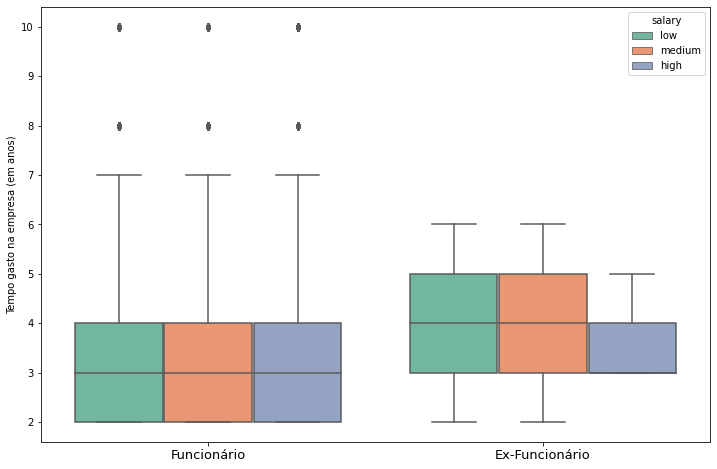

In [20]:
ax = sns.boxplot(x='left_Company', y='time_spend_company', hue='salary', data=data, palette="Set2")
ax.figure.set_size_inches(12,8)
ax.set_ylabel('Tempo gasto na empresa (em anos)')
ax.set_xlabel('')
ax.set_xticklabels(['Funcionário','Ex-Funcionário'], fontsize=13)
ax

O gráfico acima mostra os tempo gasto na empresa por quem ainda se manteve na empresa e quem já não é mais funcionário e por salário. <br>
Observavções:

1. Os boxplots se mantiveram estáveis em relação aos sários e anos de empresa para quem ainda é empregado
2. Em relação a quem já não é mais empregados, enquanto os salários baixos e médios tem quartis idênticos, o salário alto difere um pouco. O limite superior (que delimita o máximo de horas gastas na empresa) de quem tinha salário alto é igual a 75% de quem ganhava menos, já por outro lado, seu limite inferor (delimita o mínimo de horas gastas) é maior que o mínimo de quem ganhava um salário menor.
3. Comparando os dois grupos, podemos afirmar que 75% das pessoas do grupo da esquerda, trabalham há 4 anos, enquanto que 75% das pessoas que tinham salários médios e baixos do grupo da direita trabalhavam há 5 anos.
4. A variabilidade dos funcionários da empresa é maior do que quem não é mais funcionário.
5. Com exceção do salário alto de quem está mais vinculado à empresa, todos os dados são simétricos. (mediana no centro do BoxPlot)

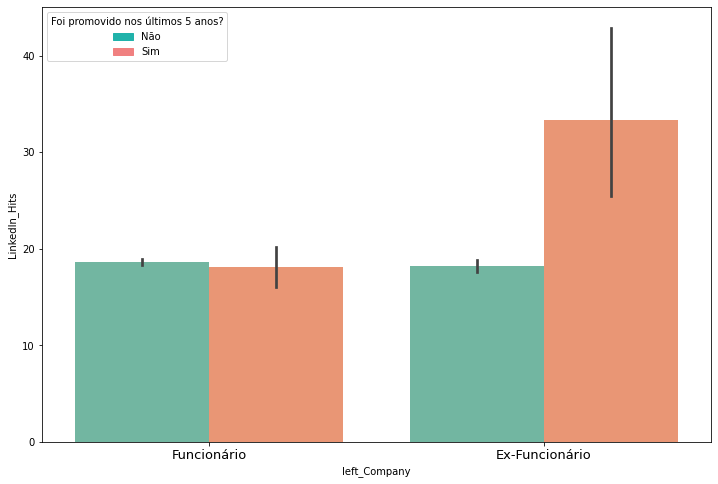

In [21]:
ax = sns.barplot(x='left_Company', y='LinkedIn_Hits', hue='promotion_last_5years', data=data, palette="Set2")
ax.figure.set_size_inches(12,8)
ax.set_xticklabels(['Funcionário','Ex-Funcionário'], fontsize=13)

import matplotlib.patches as mpatches
green = mpatches.Patch(color='lightseagreen', label='Não')
pink = mpatches.Patch(color='lightcoral', label='Sim')
plt.legend(title='Foi promovido nos últimos 5 anos?', loc='upper left', handles = [green, pink])

plt.show()

Está linha preta no meio da barra mostra o quão disperso os dados são, ou seja, quanto maior a linha, maior o desvio-padrão dos dados. Seguindo esse raciocínio, quem se desligou da empresa e tinha sido promovido nos últimos anos tem os maiores hits no LinkedIn, contudo, é o que tem mais desvio-padrão, logo não podemos confiar. As outras informações estão bem semelhantes com hits de LinkedIn por volta de 18.

In [22]:
#Observando a correlação dos dados com a variável de quem largou a empresa
data.corr()['left_Company']

Will_Relocate                           -0.009049
Percent_Remote                          -0.007150
EMP_Sat_Remote_1                        -0.045921
EMP_Sat_Remote_2                        -0.161264
EMP_Sat_Remote_5                        -0.178896
EMP_Engagement_1                        -1.000000
EMP_Engagement_2                        -1.000000
EMP_Engagement_3                        -1.000000
EMP_Engagement_4                        -1.000000
EMP_Engagement_5                        -1.000000
last_evaluation                          0.006567
number_project                           0.023787
average_montly_hours                     0.071287
time_spend_company                       0.144822
Work_accident                           -0.154622
left_Company                             1.000000
promotion_last_5years                   -0.061788
LinkedIn_Hits                           -0.006695
Emp_Work_Status2                        -0.003396
Emp_Work_Status_3                        0.001363


In [23]:
#correlação
corr = data.corr()

#valores absolutos
corr_target = abs(corr['left_Company'])

#Selecionando as features com maior correlação com a variável dependente
relevant_features = corr_target[corr_target>0.5]
relevant_features

EMP_Engagement_1    1.0
EMP_Engagement_2    1.0
EMP_Engagement_3    1.0
EMP_Engagement_4    1.0
EMP_Engagement_5    1.0
left_Company        1.0
Name: left_Company, dtype: float64

Percebemos que há atributos no dataset que tem correlação de 100% com a variável dependente e que irão enviesar o modelo de machine learning, logo, iremos descarta-las.

In [24]:
data.drop(['EMP_Engagement_1','EMP_Engagement_2','EMP_Engagement_3','EMP_Engagement_4','EMP_Engagement_5'], axis = 1, inplace = True)

Irei comparar visualmente e estatísticamente a frequência de projetos dos funcionários atuais e ex-funcionários.

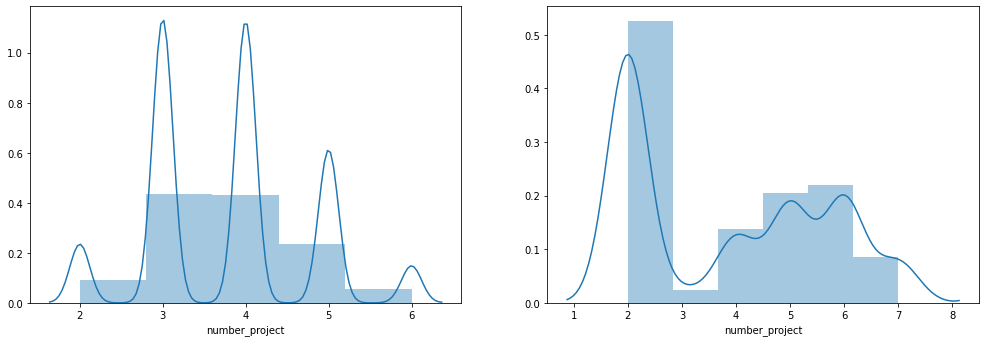

In [25]:
employee = data.query('left_Company == 0')['number_project']
ex_employee = data.query('left_Company == 1')['number_project']

plt.figure(figsize=(17,12))

plt.subplot(2, 2, 1)
sns.distplot(employee)

plt.subplot(2, 2, 2)
sns.distplot(ex_employee)

## Teste de hipótese

Teste de hipótese é uma ferramenta estatística para a tomada de decisões. Tendo como base a teoria da probabilidade, é possível a generalização de uma amostra para a população. Para fazermos isso, é necessário formular hipóteses estatísticas, que são suposições que podem ou não ser verdadeiras. Ou seja, essa metodologia nos ajuda a tomar decisões com base em parâmetros estabelecidos. Por meio do teste de hipótese buscamos responder a pergunta "Os dados da minha amostram se comportam da mesma maneira ou diferente de dados da População?", dito isso, iremos utilizar as libs scipy e statsmodels, aplicando o método ztest.
Qualquer que seja a decisão tomada, estamos sujeitos a cometer erros: 

• Erro de tipo I: rejeitar H0(Hipótese nula), quando ela é verdadeira.<br>
• Erro de tipo II: não rejeitar H0, quando ela é falsa. (são chamadas de Alfa e Beta, respectivamente)

OBS: Devemos tomar como H0 aquela hipótese que, rejeitada, conduza a um erro de tipo I mais importante de evitar.



### Escolhendo a hipótese nula e a alternativa:
H0 = A distribuição do número de projetos não difere entre as pessoas que saíram e as que permanecem na empresa.

H1 = A distribuição do número de projetos difere entre as pessoas que saíram e as que permanecem na empresa.

In [26]:
ztest, pvalue = stests.ztest(x1=employee, x2=ex_employee)
if pvalue < 0.05:
  print('Como o p-value: {:.3f} e é menor que 5% temos evidências o suficiente para rejeitar a hipótese nula'.format(pvalue))
else:
  print('Como o p-value: {:.3f} e é maior que 5% não temos evidências o suficiente para rejeitar a hipótese nula'.format(pvalue))

Como o p-value: 0.004 e é menor que 5% temos evidências o suficiente para rejeitar a hipótese nula


Em relação ao gráfico, aparentemente o número de projetos feitos por funcionários atuais é maior que os dos exs funcionários mas como explicado previamente ao fazer o teste de hipótese, podemos generalizar para toda a população.

O resultado deu um p-value que rejeita a hipótese nula, já que é menor de 0.05. Ou seja, podemos afirmar que a distribuição do número de projetos difere entre as pessoas que saíram e as que permanecem na empresa.

# O problema

Iremos fazer um modelo de Machine Learning que tenta prever se um empregado vai ou não deixar a empresa de acordo com as informações dadas no Dataset tais como de qual país ele veio, se foi promovido no últimos 5 anos, anos de trabalho na empresa, entre outros.

Nesse sentido, nossa variável dependente (y) será "left_Company" e nossas variáveis independentes (x) serão selecionadas no decorrer do processo de escolha do algoritmo.

#Transformando dados categóricos

In [27]:
#transformando os dados categóricos em numéricos
for column in data.columns:
  if data[column].dtype != np.number:
    data[column] = LabelEncoder().fit_transform(data[column])

# Baseline

Irei fazer um modelo simples para tomar como base para futuros algoritmos. Se eu não conseguir ter uma acurácia melhor do que ele, significa que meu algoritmo não é apropriado. 

Ness caso, eu escolhi que o modelo baseline irá prever que todos os empregados não saírão da empresa e verificar sua acurácia.

## Divisão em treino e teste

In [28]:
x = data.drop('left_Company', axis = 1)
y = data['left_Company']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((10499, 38), (10499,), (4500, 38), (4500,))

In [29]:
#selecionando 4500 zeros para ser minha previsão
y_predict = np.zeros(4500)

In [30]:
y_predict[:5]

array([0., 0., 0., 0., 0.])

In [31]:
accuracy_score(y_test, y_predict)

0.7697777777777778

O baseline teve acurácia de 77%, então nos próximos modelos teremos que ter uma acurácia melhor do que essa.

## O Modelo

Escolhi a regressão logística como primeiro modelo, ela é uma técnica estatística utilizada na aprendizagem supervisionada para análise de dados com resultados binários (dicotômicos), e consiste em relacionar, por meio de um modelo, a variável resposta com os fatores que se relacionam com a ocorrência do resultado tendo como objetivo fazer previsão, classificação ou estudar o relacionamento entre as variáveis.

Em Machine Learning, o algoritmo objetiva fazer classificação. Como a variável independente (y) tem apenas os valores 0 e 1, o valor previsto deve ser limitado para cair dentro do mesmo domínio. O resultado obtido com o algoritmo então é a probabilidade de ocorrência do evento de interesse (y = 1), a partir da qual será feita a classificação dos objetos. Se a probabilidade for baixa o objeto será classificado como 0, se for alta será classificado como 1.

O desempenho do modelo de classificação pode ser mensurado pelas medidas usuais de acurácia, precisão e recall que são calculadas a partir da matriz de confusão, que organiza os resultados do modelo comparando-os com os resultados reais dos dados.

### Selecionando features

Iremos selecionar somente as features com mais explicabilidade e menos complexibilidade para podermos ter um processo de treinamento do modelo rapidamente, com o mínimo de ruído possível e com alta acurácia. 

O método Recursive Feature Elimination - como o próprio nome diz - cria o modelo a partir da exclusão de algumas features.

Este método identifica a acurácia do modelo para assim escolher as melhores features e suas combinações que tornam o modelo mais eficiente.

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

lr = LogisticRegression(max_iter=2000)
rfe = RFE(lr,22)
features = rfe.fit(x_train, y_train) #treinando

print('o número de features é: {}'.format(features.n_features_))

y_predict = features.predict(x_test) #predição
print('A acurácia é: {}'.format(accuracy_score(y_test, y_predict)*100))

o número de features é: 22
A acurácia é: 89.88888888888889


In [33]:
#visualizando as colunas geradas
cols = features.get_support(indices=True)
data.iloc[:,cols]

,Role,Will_Relocate,Percent_Remote,EMP_Sat_Remote_1,EMP_Sat_Remote_2,EMP_Sat_Remote_5,last_evaluation,number_project,time_spend_company,Work_accident,left_Company,promotion_last_5years,salary,Emp_Work_Status_5,Emp_Identity,Emp_Role,Emp_Position,Emp_Title,Emp_Competitive_2,Emp_Collaborative_1,Sensor_StepCount,Sensor_Heartbeat(Average/Min)
0,6,0,0.4,0,0,0,0.36,1,1,1,0,0,1,0,0,0,1,0,3,1,836,1
1,4,0,0.4,0,0,0,0.36,3,0,0,0,0,1,2,1,0,1,0,1,2,985,26
2,4,0,0.4,0,0,0,0.36,0,1,0,0,0,2,2,0,0,1,1,4,1,1943,20
3,4,0,0.4,0,0,0,0.36,2,2,1,0,0,0,4,1,0,1,0,0,0,1980,17
4,0,0,0.4,0,0,0,0.36,4,3,0,0,0,1,4,0,0,1,0,3,4,1907,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,2,1,1.0,2,1,1,1.00,2,3,0,1,0,2,1,1,0,1,0,0,3,533,24
14995,2,1,1.0,2,1,1,1.00,2,3,0,1,0,2,3,0,1,1,0,4,2,246,25
14996,2,0,1.0,2,1,1,1.00,3,3,0,1,0,1,4,0,0,1,0,1,3,155,24
14997,2,0,1.0,2,1,1,1.00,3,4,0,1,0,2,1,0,1,0,0,0,1,210,22


In [34]:
#selecionando as novas features
x = data.iloc[:,cols].drop('left_Company', axis = 1)

In [35]:
#matriz de confusão
confusion_matrix = confusion_matrix(y_test, y_predict)
confusion_matrix

array([[3305,  159],
       [ 296,  740]])

A matriz de confusão retornou 3.302 valores verdadeiro positivo e 746 verdadeiro negativo, a soma desses valores foi o total de valores que meu modelo acertou (4.048).

O recall é uma métrica que nos diz qual a proporção de positivos foram identificados corretamente. Para sabermos esse valor basta fazer a divisão dos valores verdadeiros positivos com a soma dos valores verdadeiros positivos e falsos negativos. 

Já para sabermos a precisão, que é a proporção de identificações positivas que  foram realmente corretas, precisamos fazer a divisão dos verdadeiros positivos pela soma dos verdadeiros positivos com os falsos positivos.



In [36]:
recall = 3365 / (3365 + 504)
precision = 3365 / (3365 + 99)
print('Recall: {}'.format(recall))
print('Precisão: {}'.format(precision))

Recall: 0.8697337813388473
Precisão: 0.9714203233256351


# Gerando vários modelos de Machine Learning

Apliquei Pipelines para otimizar o trabalho e selecionar e validar os modelos escolhidos. Além de que, o uso de Pipelines facilita o entedimento dos processos feitos e sua manutenção.

Utilizei o método StratifiedKFold para que as categoricas sejam estratificadas, ou seja, os valores tenham proporções iguais. Além disso, passei como parâmetro o n_splits = 5 que divide os dados em "folds" e faz que o fold 1 seja treinado com os folds 2 a 5, o fold 2 é treinado com o fold 1,3,4,5 e assim sucessivamente. Dessa maneira, teremos 5 métricas com diferentes amostras!
Adicionado a isso, usei o parâmetro "shuffle = True" que faz com que as amostras se misturem. Feito isto, a atribuo a uma variável "cv" que será usada adiante no Cross-Validation.

Em cada Pipeline eu fiz o seguinte processo:

1. Escalei os dados com StandardScaler()
2. Setei o Modelo de Machine Learning

Feito isto, eu prossigo:

3. Treinei e testei meus dados pela validação cruzada com 2 diferentes avaliadores de modelos
4. Adicionei o valor da acurácia à lista "metrica" criada anteriormente.

OBS: a acurácia é medida através de Cross-Validation que é uma técnica para saber se meu modelo consegue generalizar para diversas amostras. Como parâmetro eu passo o pipeline, as variáveis explicativas e a dependente, o  StratifiedKFold que já foi explicado e o último parâmetro scoring='accuracy' e scoring='recall' são as métricas utilizadas para o modelo. O próprio modelo separa em treino e teste como dito anteriormente.


In [37]:
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [38]:
metrica = []

cv = StratifiedKFold(n_splits = 5, shuffle = True)

pip1 = Pipeline([
                 ('scaler', StandardScaler()),
                 ('LR', LogisticRegression())
])
validation1 = cross_val_score(pip1, x, y, cv = cv, scoring='accuracy')
validation2 = cross_val_score(pip1, x, y, cv = cv, scoring='recall')

metrica.append({'Accuracy': np.mean(validation1),
                'Recall': np.mean(validation2)})

pip2 = Pipeline([
                 ('scaler', StandardScaler()),
                 ('NB', GaussianNB())
])
validation1 = cross_val_score(pip2, x, y, cv = cv, scoring='accuracy')
validation2 = cross_val_score(pip1, x, y, cv = cv, scoring='recall')

metrica.append({'Accuracy': np.mean(validation1),
                'Recall': np.mean(validation2)})

pip3 = Pipeline([
                 ('scaler', StandardScaler()),
                 ('RFC', RandomForestClassifier(n_estimators=1000, max_features=8))
])
validation1 = cross_val_score(pip3, x, y, cv = cv, scoring='accuracy')
validation2 = cross_val_score(pip1, x, y, cv = cv, scoring='recall')

metrica.append({'Accuracy': np.mean(validation1),
                'Recall': np.mean(validation2)})

pip4 = Pipeline([
                 ('scaler', StandardScaler()),
                 ('DTC', DecisionTreeClassifier(max_depth=3))
])
validation1 = cross_val_score(pip4, x, y, cv = cv, scoring='accuracy')
validation2 = cross_val_score(pip1, x, y, cv = cv, scoring='recall')

metrica.append({'Accuracy': np.mean(validation1),
                'Recall': np.mean(validation2)})

Processo concluído, abaixo eu fiz um loop mostrando o modelo e a acurácia de cada um dos Pipelines.

Obs: O modelo de Regressão Logística deu acurácia diferente da primeiro vez pois aqui eu estou usando a validação cruzada enquanto que inicialmente eu usei somente uma amostra para medir a acurácia.

In [39]:
models = ['RegressãoLogística','NaiveBayes','RandomForest','DecisionTree'] #criando label

for model, metricas in zip(models, metrica):
    print(model, ':', metricas)

RegressãoLogística : {'Accuracy': 0.8963262198510614, 'Recall': 0.7328495034377388}
NaiveBayes : {'Accuracy': 0.7283160164499278, 'Recall': 0.7303281032692797}
RandomForest : {'Accuracy': 0.9910661331554962, 'Recall': 0.7314473761532586}
DecisionTree : {'Accuracy': 0.9738648882960987, 'Recall': 0.7331256978315801}


# Conclusão

A área de Recursos Humanos vêm cada vez se apropriando mais de técnicas de Data Science para aprimorar seu negócio, através dessas técnicas é possível analisar grandes quantidades de dados e não só melhorar os recrutamentos de novos funcionários como também aperfeiçoar a demição de funcionários improdutivos, entre outras possibilidades.

Inicialmente foi feita a análise de dados onde percebemos que havia vários valores nulos no dataset, então limpamos e notamos que havia vários atributos que não nos traziam muita informação a respeito da variável alvo, em seguida as excluímos e fomos adiante fazendo análise descritiva e de forma visual para facilitar o entedimento.

Após termos conhecimento do dataset, foi possível utilizar Machine Learning que é uma técnica de Data Science muito conhecida e útil para predição, sendo assim, eu criei um problema de classificação, onde eu queria prever se um funcionário vai ou não continuar na empresa e através do modelo Random Forest consegui uma acurácia de 99% mas com um recall não tão bom de aproximadamente 73%.

Em suma, os dados estão cada vez mais presentes em todas as áreas e a têndencia é de aumento, então saber trabalhar com esses dados é de extrema importância. Espero ter atingido a proposta deste desafio através das explicações e códigos apresentados neste notebook. Obrigado.